In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score
from lightgbm import LGBMClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_test = pd.read_csv("TestSample.csv")
df_train = pd.read_csv("TestSample.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 49 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCTAGE  4962 non-null   float64
 1   AGE      4228 non-null   float64
 2   ATM      5310 non-null   float64
 3   ATMAMT   5310 non-null   float64
 4   BRANCH   5310 non-null   object 
 5   CASHBK   5310 non-null   float64
 6   CC       4647 non-null   float64
 7   CCBAL    4647 non-null   float64
 8   CCPURC   4647 non-null   float64
 9   CD       5310 non-null   float64
 10  CDBAL    5310 non-null   float64
 11  CHECKS   5310 non-null   float64
 12  CRSCORE  5198 non-null   float64
 13  DDA      5310 non-null   float64
 14  DDABAL   5310 non-null   float64
 15  DEP      5310 non-null   float64
 16  DEPAMT   5310 non-null   float64
 17  DIRDEP   5310 non-null   float64
 18  HMOWN    4376 non-null   float64
 19  HMVAL    4321 non-null   float64
 20  ILS      5310 non-null   float64
 21  ILSBAL   5310 

In [4]:
df_test.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 49 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCTAGE  4962 non-null   float64
 1   AGE      4228 non-null   float64
 2   ATM      5310 non-null   float64
 3   ATMAMT   5310 non-null   float64
 4   BRANCH   5310 non-null   object 
 5   CASHBK   5310 non-null   float64
 6   CC       4647 non-null   float64
 7   CCBAL    4647 non-null   float64
 8   CCPURC   4647 non-null   float64
 9   CD       5310 non-null   float64
 10  CDBAL    5310 non-null   float64
 11  CHECKS   5310 non-null   float64
 12  CRSCORE  5198 non-null   float64
 13  DDA      5310 non-null   float64
 14  DDABAL   5310 non-null   float64
 15  DEP      5310 non-null   float64
 16  DEPAMT   5310 non-null   float64
 17  DIRDEP   5310 non-null   float64
 18  HMOWN    4376 non-null   float64
 19  HMVAL    4321 non-null   float64
 20  ILS      5310 non-null   float64
 21  ILSBAL   5310 

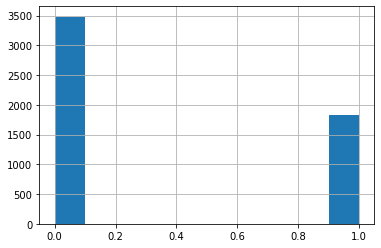

In [5]:
df_train["INS"].hist();

Fill missed values and preprocess features

In [6]:
feats_b = []
feats_c = []
feats_n = []

In [7]:
def print_info(f):
    print(df_train[f].describe(percentiles=(0.5, 0.75, 0.9)))
    print("uniq", len(df_train[f].unique()))
    df_train[f].hist()

count    4962.000000
mean        6.087485
std         6.741748
min         0.300000
50%         4.000000
75%         7.200000
90%        15.000000
max        56.300000
Name: ACCTAGE, dtype: float64
uniq 332


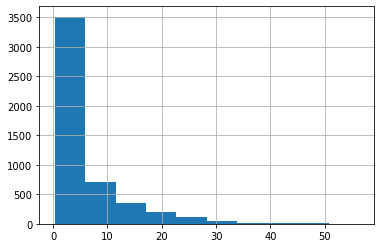

In [8]:
print_info("ACCTAGE")

In [9]:
df_train["ACCTAGE"].fillna(0, inplace=True)
df_test["ACCTAGE"].fillna(0, inplace=True)
feats_n.append("ACCTAGE")

count    4228.000000
mean       47.840587
std        14.130861
min        16.000000
50%        48.000000
75%        58.000000
90%        67.000000
max        94.000000
Name: AGE, dtype: float64
uniq 78


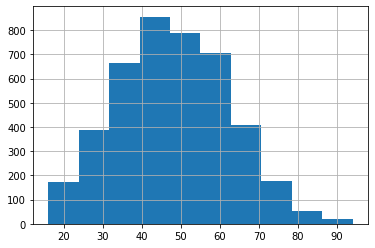

In [10]:
print_info("AGE")

In [11]:
df_train["AGE"].fillna(df_train["AGE"].mean(), inplace=True)
df_test["AGE"].fillna(df_train["AGE"].mean(), inplace=True)
feats_n.append("AGE")

count    5310.000000
mean        0.602072
std         0.489517
min         0.000000
50%         1.000000
75%         1.000000
90%         1.000000
max         1.000000
Name: ATM, dtype: float64
uniq 2


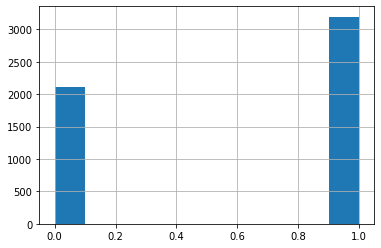

In [12]:
print_info("ATM")

In [13]:
feats_b.append("ATM")

count     5310.000000
mean      1188.928953
std       3624.149080
min          0.000000
50%        127.645000
75%       1198.865000
90%       2974.209000
max      96370.460000
Name: ATMAMT, dtype: float64
uniq 3026


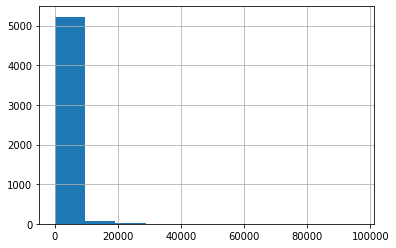

In [14]:
print_info("ATMAMT")

In [15]:
df_train["ATMAMT"] = df_train["ATMAMT"].apply(lambda x: np.log(1 + x))
df_test["ATMAMT"] = df_test["ATMAMT"].apply(lambda x: np.log(1 + x))
feats_n.append("ATMAMT")

count     5310
unique      19
top         B4
freq       915
Name: BRANCH, dtype: object
uniq 19


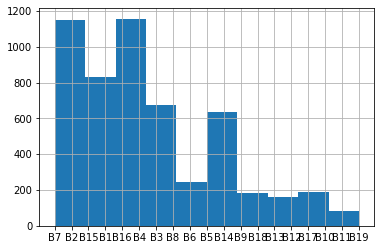

In [16]:
print_info("BRANCH")

In [17]:
feats_c.append("BRANCH")

count    5310.000000
mean        0.014501
std         0.122665
min         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max         2.000000
Name: CASHBK, dtype: float64
uniq 3


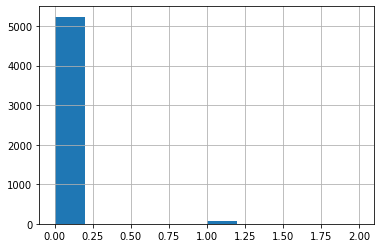

In [18]:
print_info("CASHBK")

In [19]:
df_train["CASHBK"] = df_train["CASHBK"].apply(lambda x: x > 0)
df_test["CASHBK"] = df_test["CASHBK"].apply(lambda x: x > 0)
feats_b.append("CASHBK")

count    4647.000000
mean        0.479234
std         0.499622
min         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
max         1.000000
Name: CC, dtype: float64
uniq 3


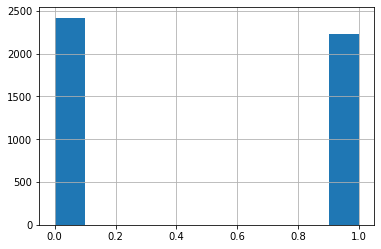

In [20]:
print_info("CC")

In [21]:
df_train["CC"].fillna(0, inplace=True)
df_test["CC"].fillna(0, inplace=True)
feats_b.append("CC")

count    4.647000e+03
mean     9.121378e+03
std      4.743963e+04
min     -8.974600e+02
50%      0.000000e+00
75%      4.137850e+02
90%      7.452184e+03
max      1.384202e+06
Name: CCBAL, dtype: float64
uniq 1811


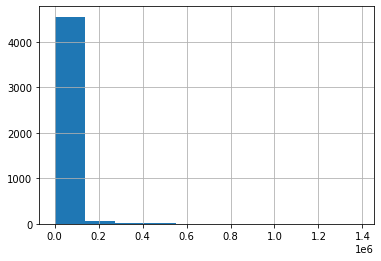

In [22]:
print_info("CCBAL")

In [23]:
df_train["CCBAL"].fillna(0, inplace=True)
df_test["CCBAL"].fillna(0, inplace=True)
df_train["CCBAL"] = df_train["CCBAL"].apply(lambda x: np.log(1 + np.abs(x)) * np.sign(x))
df_test["CCBAL"] = df_test["CCBAL"].apply(lambda x: np.log(1 + np.abs(x)) * np.sign(x))
feats_n.append("CCBAL")

count    4647.000000
mean        0.145470
std         0.429152
min         0.000000
50%         0.000000
75%         0.000000
90%         1.000000
max         4.000000
Name: CCPURC, dtype: float64
uniq 6


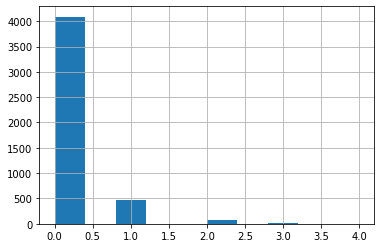

In [24]:
print_info("CCPURC")

In [25]:
df_train["CCPURC"].fillna(0, inplace=True)
df_test["CCPURC"].fillna(0, inplace=True)
df_train["CCPURC"] = df_train["CCPURC"].apply(lambda x: x > 0)
df_test["CCPURC"] = df_test["CCPURC"].apply(lambda x: x > 0)
feats_b.append("CCPURC")

count    5310.000000
mean        0.120716
std         0.325827
min         0.000000
50%         0.000000
75%         0.000000
90%         1.000000
max         1.000000
Name: CD, dtype: float64
uniq 2


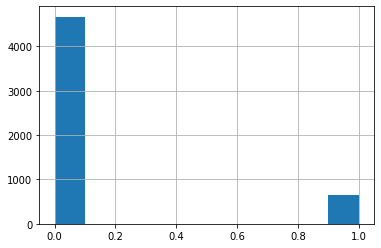

In [26]:
print_info("CD")

In [27]:
feats_b.append("CD")

count      5310.000000
mean       2301.242938
std       11475.528861
min           0.000000
50%           0.000000
75%           0.000000
90%        4000.000000
max      263600.000000
Name: CDBAL, dtype: float64
uniq 265


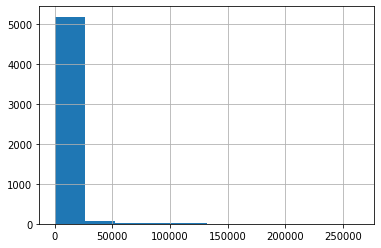

In [28]:
print_info("CDBAL")

In [29]:
df_train["CDBAL"] = df_train["CDBAL"].apply(lambda x: np.log(1 + x))
df_test["CDBAL"] = df_test["CDBAL"].apply(lambda x: np.log(1 + x))
feats_n.append("CDBAL")

count    5310.000000
mean        4.321092
std         5.231062
min         0.000000
50%         2.500000
75%         7.000000
90%        12.000000
max        48.000000
Name: CHECKS, dtype: float64
uniq 37


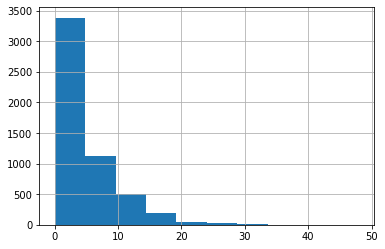

In [30]:
print_info("CHECKS")

In [31]:
feats_n.append("CHECKS")

count    5198.000000
mean      666.691805
std        40.052155
min       534.000000
50%       667.000000
75%       693.000000
90%       717.000000
max       807.000000
Name: CRSCORE, dtype: float64
uniq 247


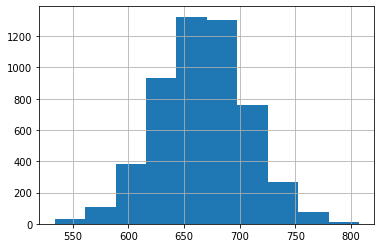

In [32]:
print_info("CRSCORE")

In [33]:
df_train["CRSCORE"].fillna(df_train["CRSCORE"].mean(), inplace=True)
df_test["CRSCORE"].fillna(df_train["CRSCORE"].mean(), inplace=True)
feats_n.append("CRSCORE")

count    5310.000000
mean        0.816949
std         0.386745
min         0.000000
50%         1.000000
75%         1.000000
90%         1.000000
max         1.000000
Name: DDA, dtype: float64
uniq 2


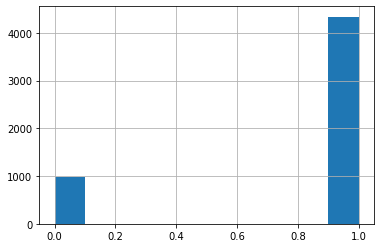

In [34]:
print_info("DDA")

In [35]:
feats_b.append("DDA")

count      5310.000000
mean       2201.727633
std        7829.191031
min         -85.080000
50%         615.885000
75%        1845.170000
90%        4663.016000
max      259734.260000
Name: DDABAL, dtype: float64
uniq 4296


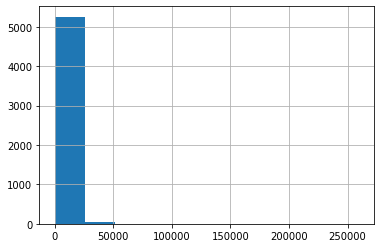

In [36]:
print_info("DDABAL")

In [37]:
df_train["DDABAL"] = df_train["DDABAL"].apply(lambda x: np.log(1 + np.abs(x)) * np.sign(x))
df_test["DDABAL"] = df_test["DDABAL"].apply(lambda x: np.log(1 + np.abs(x)) * np.sign(x))
feats_n.append("DDABAL")

count    5310.000000
mean        2.127495
std         1.710696
min         0.000000
50%         2.000000
75%         3.000000
90%         4.000000
max        20.000000
Name: DEP, dtype: float64
uniq 13


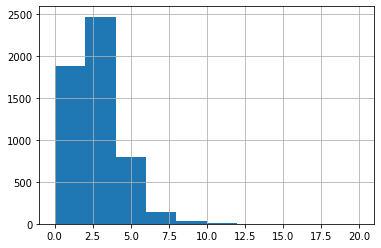

In [38]:
print_info("DEP")

In [39]:
feats_n.append("DEP")

count      5310.000000
mean       2177.149426
std        5042.053560
min           0.000000
50%        1099.130000
75%        2477.880000
90%        4820.312000
max      162596.530000
Name: DEPAMT, dtype: float64
uniq 4133


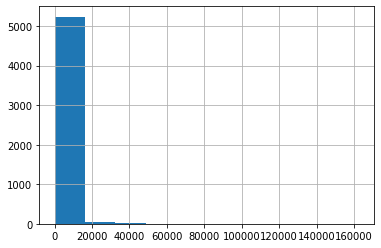

In [40]:
print_info("DEPAMT")

In [41]:
df_train["DEPAMT"] = df_train["DEPAMT"].apply(lambda x: np.log(1 + x))
df_test["DEPAMT"] = df_test["DEPAMT"].apply(lambda x: np.log(1 + x))
feats_n.append("DEPAMT")

count    5310.000000
mean        0.293974
std         0.455623
min         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
max         1.000000
Name: DIRDEP, dtype: float64
uniq 2


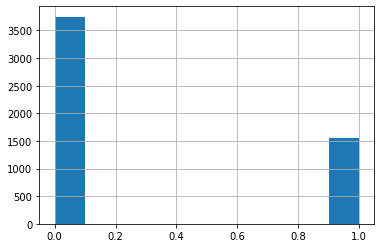

In [42]:
print_info("DIRDEP")

In [43]:
feats_b.append("DIRDEP")

count    4376.000000
mean        0.541133
std         0.498362
min         0.000000
50%         1.000000
75%         1.000000
90%         1.000000
max         1.000000
Name: HMOWN, dtype: float64
uniq 3


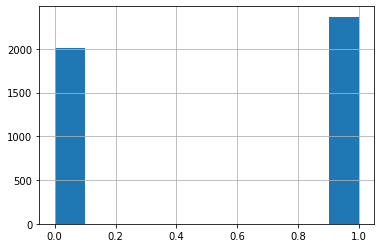

In [44]:
print_info("HMOWN")

In [45]:
df_train["HMOWN"].fillna(0, inplace=True)
df_test["HMOWN"].fillna(0, inplace=True)
feats_b.append("HMOWN")

count    4321.000000
mean      111.007637
std        22.852540
min        69.000000
50%       108.000000
75%       120.000000
90%       134.000000
max       625.000000
Name: HMVAL, dtype: float64
uniq 137


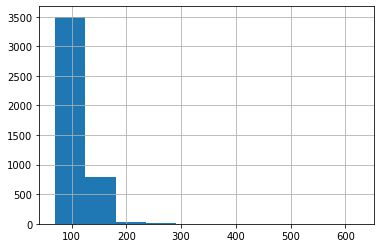

In [46]:
print_info("HMVAL")

In [47]:
df_train["HMVAL"].fillna(df_train["HMVAL"].median(), inplace=True)
df_test["HMVAL"].fillna(df_train["HMVAL"].median(), inplace=True)
feats_n.append("HMVAL")

count    5310.000000
mean        0.050659
std         0.219321
min         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max         1.000000
Name: ILS, dtype: float64
uniq 2


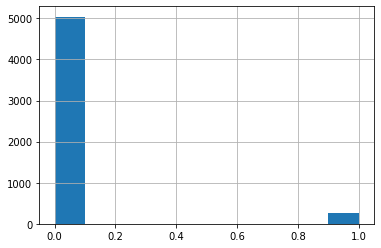

In [48]:
print_info("ILS")

In [49]:
feats_b.append("ILS")

count     5310.000000
mean       532.476484
std       2333.772166
min          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
max      26806.590000
Name: ILSBAL, dtype: float64
uniq 270


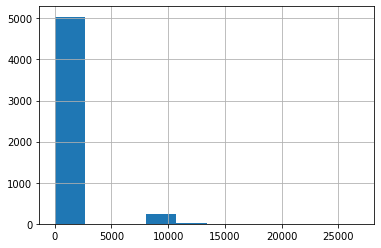

In [50]:
print_info("ILSBAL")

In [51]:
df_train["ILSBAL"] = df_train["ILSBAL"].apply(lambda x: np.log(1 + x))
df_test["ILSBAL"] = df_test["ILSBAL"].apply(lambda x: np.log(1 + x))
feats_n.append("ILSBAL")

count    5310.000000
mean        0.962900
std         0.189024
min         0.000000
50%         1.000000
75%         1.000000
90%         1.000000
max         1.000000
Name: INAREA, dtype: float64
uniq 2


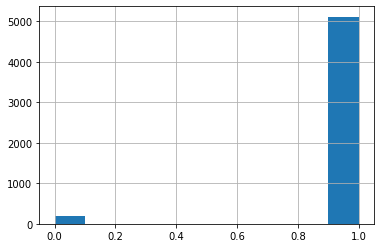

In [52]:
print_info("INAREA")

In [53]:
feats_b.append("INAREA")

count    4321.000000
mean       40.795649
std        28.612589
min         0.000000
50%        35.000000
75%        55.000000
90%        79.000000
max       225.000000
Name: INCOME, dtype: float64
uniq 165


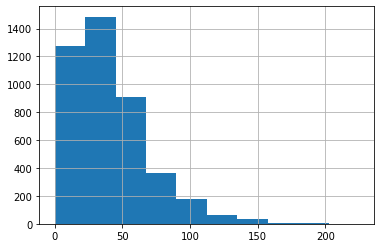

In [54]:
print_info("INCOME")

In [55]:
df_train["INCOME"].fillna(df_train["INCOME"].median(), inplace=True)
df_test["INCOME"].fillna(df_train["INCOME"].median(), inplace=True)
feats_n.append("INCOME")

count    4647.000000
mean        0.028836
std         0.167363
min         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max         1.000000
Name: INV, dtype: float64
uniq 3


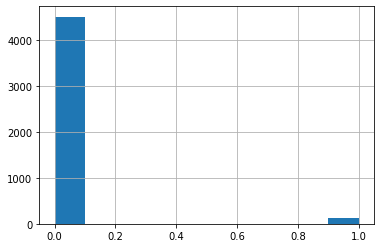

In [56]:
print_info("INV")

In [57]:
df_train["INV"].fillna(0, inplace=True)
df_test["INV"].fillna(0, inplace=True)
feats_b.append("INV")

count      4647.000000
mean        560.907024
std        9396.028674
min           0.000000
50%           0.000000
75%           0.000000
90%           0.000000
max      391049.980000
Name: INVBAL, dtype: float64
uniq 73


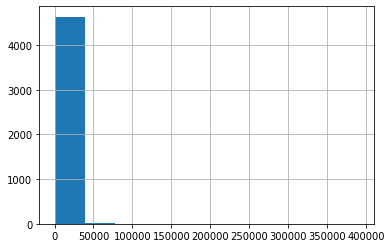

In [58]:
print_info("INVBAL")

In [59]:
df_train["INVBAL"].fillna(0, inplace=True)
df_test["INVBAL"].fillna(0, inplace=True)
df_train["INVBAL"] = df_train["INVBAL"].apply(lambda x: np.log(1 + x))
df_test["INVBAL"] = df_test["INVBAL"].apply(lambda x: np.log(1 + x))
feats_n.append("INVBAL")

count    5310.000000
mean        0.057439
std         0.232701
min         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max         1.000000
Name: IRA, dtype: float64
uniq 2


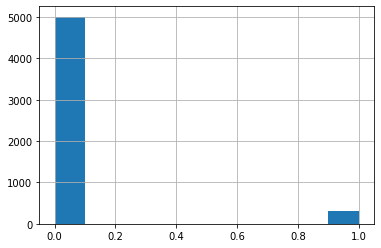

In [60]:
print_info("IRA")

In [61]:
feats_b.append("IRA")

count      5310.000000
mean        627.439254
std        6292.840484
min           0.000000
50%           0.000000
75%           0.000000
90%           0.000000
max      266220.760000
Name: IRABAL, dtype: float64
uniq 283


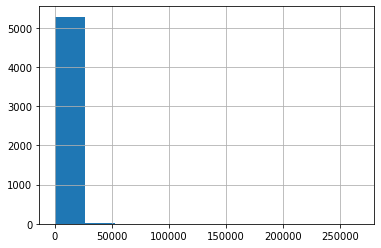

In [62]:
print_info("IRABAL")

In [63]:
df_train["IRABAL"] = df_train["IRABAL"].apply(lambda x: np.log(1 + x))
df_test["IRABAL"] = df_test["IRABAL"].apply(lambda x: np.log(1 + x))
feats_n.append("IRABAL")

count    5310.000000
mean        0.063277
std         0.243483
min         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max         1.000000
Name: LOC, dtype: float64
uniq 2


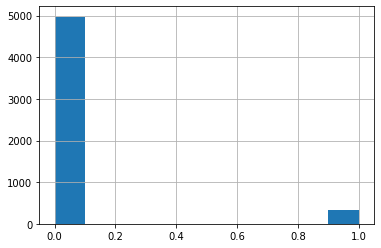

In [64]:
print_info("LOC")

In [65]:
feats_b.append("LOC")

count      5310.000000
mean       1136.555663
std       10468.457147
min          -0.230000
50%           0.000000
75%           0.000000
90%           0.000000
max      367098.200000
Name: LOCBAL, dtype: float64
uniq 302


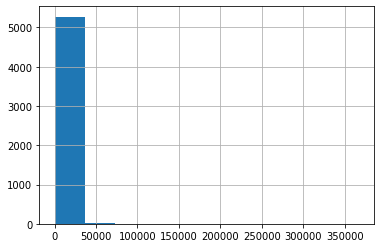

In [66]:
print_info("LOCBAL")

In [67]:
df_train["LOCBAL"] = df_train["LOCBAL"].apply(lambda x: np.log(1 + np.abs(x)) * np.sign(x))
df_test["LOCBAL"] = df_test["LOCBAL"].apply(lambda x: np.log(1 + np.abs(x)) * np.sign(x))
feats_n.append("LOCBAL")

count    4321.000000
mean        7.005207
std         2.822472
min         1.000000
50%         7.000000
75%         9.000000
90%        11.000000
max        18.000000
Name: LORES, dtype: float64
uniq 36


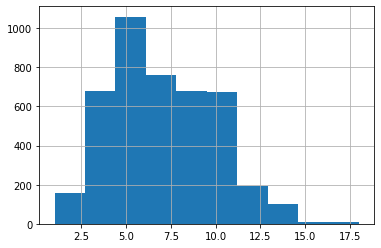

In [68]:
print_info("LORES")

In [69]:
df_train["LORES"].fillna(df_train["LORES"].median(), inplace=True)
df_test["LORES"].fillna(df_train["LORES"].median(), inplace=True)
feats_n.append("LORES")

count    5310.000000
mean        0.116573
std         0.320940
min         0.000000
50%         0.000000
75%         0.000000
90%         1.000000
max         1.000000
Name: MM, dtype: float64
uniq 2


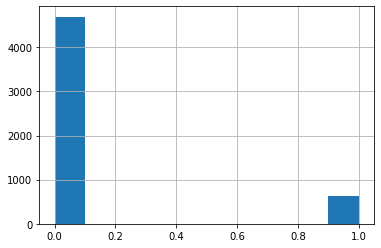

In [70]:
print_info("MM")

In [71]:
feats_b.append("MM")

count      5310.000000
mean       1921.260563
std        5629.039569
min           0.000000
50%           0.000000
75%           0.000000
90%       14864.231000
max      107028.550000
Name: MMBAL, dtype: float64
uniq 620


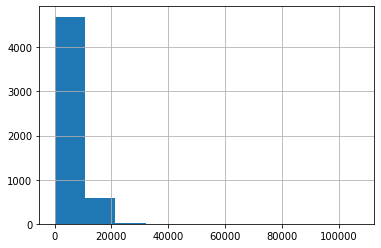

In [72]:
print_info("MMBAL")

In [73]:
df_train["MMBAL"] = df_train["MMBAL"].apply(lambda x: np.log(1 + x))
df_test["MMBAL"] = df_test["MMBAL"].apply(lambda x: np.log(1 + x))
feats_n.append("MMBAL")

count    5310.000000
mean        0.054426
std         0.279679
min         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max         5.000000
Name: MMCRED, dtype: float64
uniq 5


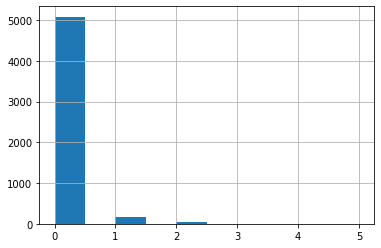

In [74]:
print_info("MMCRED")

In [75]:
df_train["MMCRED"] = df_train["MMCRED"].apply(lambda x: x > 0)
df_test["MMCRED"] = df_test["MMCRED"].apply(lambda x: x > 0)
feats_b.append("MMCRED")

count    5310.000000
mean        0.026742
std         0.161344
min         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max         1.000000
Name: MOVED, dtype: float64
uniq 2


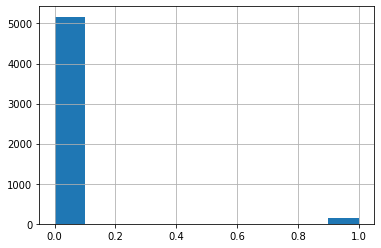

In [76]:
print_info("MOVED")

In [77]:
feats_b.append("MOVED")

count    5310.000000
mean        0.048399
std         0.214629
min         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max         1.000000
Name: MTG, dtype: float64
uniq 2


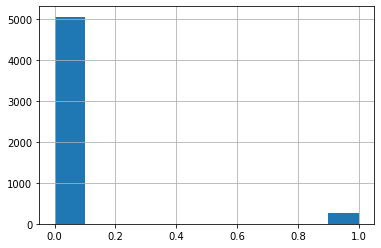

In [78]:
print_info("MTG")

In [79]:
feats_b.append("MTG")

count    5.310000e+03
mean     7.244960e+03
std      4.722449e+04
min      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
90%      0.000000e+00
max      1.550473e+06
Name: MTGBAL, dtype: float64
uniq 256


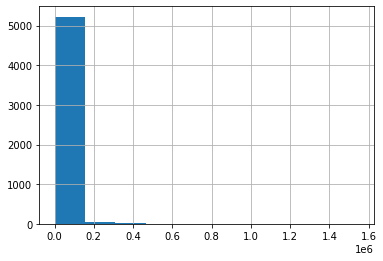

In [80]:
print_info("MTGBAL")

In [81]:
df_train["MTGBAL"] = df_train["MTGBAL"].apply(lambda x: np.log(1 + x))
df_test["MTGBAL"] = df_test["MTGBAL"].apply(lambda x: np.log(1 + x))
feats_n.append("MTGBAL")

count    5310.000000
mean        0.086064
std         0.280485
min         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max         1.000000
Name: NSF, dtype: float64
uniq 2


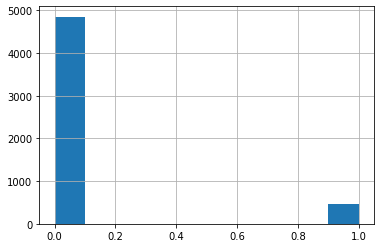

In [82]:
print_info("NSF")

In [83]:
feats_b.append("NSF")

count    5310.000000
mean        2.321320
std        13.934917
min         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max       321.100000
Name: NSFAMT, dtype: float64
uniq 432


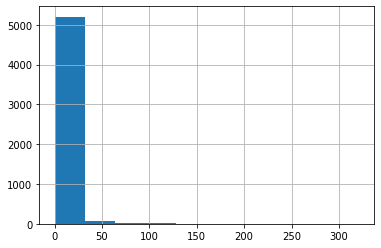

In [84]:
print_info("NSFAMT")

In [85]:
df_train["NSFAMT"] = df_train["NSFAMT"].apply(lambda x: np.log(1 + x))
df_test["NSFAMT"] = df_test["NSFAMT"].apply(lambda x: np.log(1 + x))
feats_n.append("NSFAMT")

count    4647.000000
mean        0.382828
std         1.120961
min         0.000000
50%         0.000000
75%         0.000000
90%         1.000000
max        13.000000
Name: PHONE, dtype: float64
uniq 14


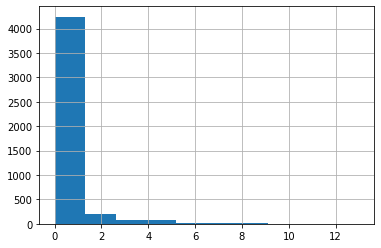

In [86]:
print_info("PHONE")

In [87]:
df_train["PHONE"].fillna(0, inplace=True)
df_test["PHONE"].fillna(0, inplace=True)
feats_c.append("PHONE")

count    4647.000000
mean        1.072950
std         2.829426
min         0.000000
50%         0.000000
75%         0.000000
90%         4.000000
max        36.000000
Name: POS, dtype: float64
uniq 29


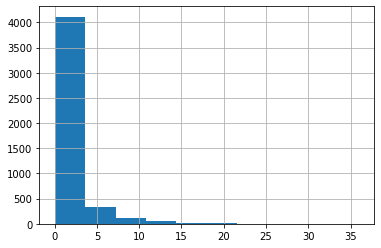

In [88]:
print_info("POS")

In [89]:
df_train["POS"].fillna(0, inplace=True)
df_test["POS"].fillna(0, inplace=True)
feats_n.append("POS")

count    4647.000000
mean       50.241524
std       141.494939
min         0.000000
50%         0.000000
75%         0.000000
90%       166.932000
max      2933.830000
Name: POSAMT, dtype: float64
uniq 1078


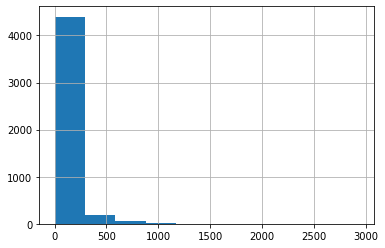

In [90]:
print_info("POSAMT")

In [91]:
df_train["POSAMT"].fillna(0, inplace=True)
df_test["POSAMT"].fillna(0, inplace=True)
df_train["POSAMT"] = df_train["POSAMT"].apply(lambda x: np.log(1 + x))
df_test["POSAMT"] = df_test["POSAMT"].apply(lambda x: np.log(1 + x))
feats_n.append("POSAMT")

count     5310
unique       3
top          U
freq      2063
Name: RES, dtype: object
uniq 3


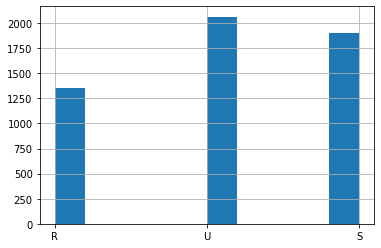

In [92]:
print_info("RES")

In [93]:
feats_c.append("RES")

count    5310.000000
mean        0.468173
std         0.499033
min         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
max         1.000000
Name: SAV, dtype: float64
uniq 2


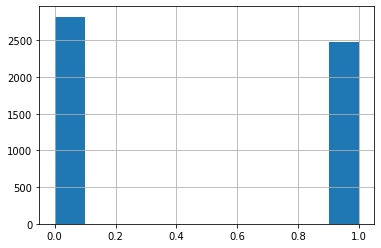

In [94]:
print_info("SAV")

In [95]:
feats_b.append("SAV")

count      5310.000000
mean       3365.133891
std       15613.170370
min           0.000000
50%           0.000000
75%        1196.802500
90%        7500.564000
max      609587.720000
Name: SAVBAL, dtype: float64
uniq 2416


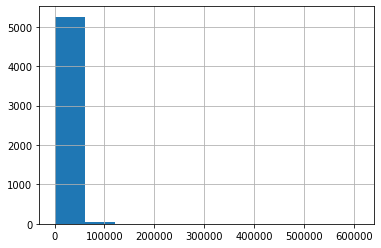

In [96]:
print_info("SAVBAL")

In [97]:
df_train["SAVBAL"] = df_train["SAVBAL"].apply(lambda x: np.log(1 + x))
df_test["SAVBAL"] = df_test["SAVBAL"].apply(lambda x: np.log(1 + x))
feats_n.append("SAVBAL")

count    5310.000000
mean        0.108286
std         0.310771
min         0.000000
50%         0.000000
75%         0.000000
90%         1.000000
max         1.000000
Name: SDB, dtype: float64
uniq 2


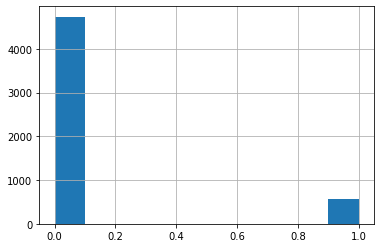

In [98]:
print_info("SDB")

In [99]:
feats_b.append("SDB")

count    5310.000000
mean        1.425047
std         2.403522
min         0.000000
50%         0.000000
75%         2.000000
90%         4.000000
max        25.000000
Name: TELLER, dtype: float64
uniq 23


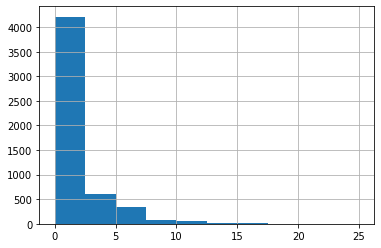

In [100]:
print_info("TELLER")

In [101]:
feats_n.append("TELLER")

In [102]:
print(feats_n)
print(feats_b)
print(feats_c)

['ACCTAGE', 'AGE', 'ATMAMT', 'CCBAL', 'CDBAL', 'CHECKS', 'CRSCORE', 'DDABAL', 'DEP', 'DEPAMT', 'HMVAL', 'ILSBAL', 'INCOME', 'INVBAL', 'IRABAL', 'LOCBAL', 'LORES', 'MMBAL', 'MTGBAL', 'NSFAMT', 'POS', 'POSAMT', 'SAVBAL', 'TELLER']
['ATM', 'CASHBK', 'CC', 'CCPURC', 'CD', 'DDA', 'DIRDEP', 'HMOWN', 'ILS', 'INAREA', 'INV', 'IRA', 'LOC', 'MM', 'MMCRED', 'MOVED', 'MTG', 'NSF', 'SAV', 'SDB']
['BRANCH', 'PHONE', 'RES']


In [103]:
df_train[feats_b] = df_train[feats_b].astype(int)
df_test[feats_b] = df_test[feats_b].astype(int)

for f in feats_c:
    m = {k: i for i, k in enumerate(np.unique(df_train[f].values))}
    df_train[f] = df_train[f].apply(lambda x: m[x]).astype(int)
    df_test[f] = df_test[f].apply(lambda x: m[x]).astype(int)

sc = StandardScaler()
df_train[feats_n] = sc.fit_transform(df_train[feats_n].astype(float))
df_test[feats_n] = sc.transform(df_test[feats_n].astype(float))

Fit and score models

In [104]:
seed = 13
scorer = make_scorer(roc_auc_score, needs_proba=True)

In [105]:
# parameters = {"class_weight": ["balanced"], "random_state": [seed], "max_iter": [5000], "C": [1e0, 1e1]}
# lr = GridSearchCV(LogisticRegression(), parameters, scoring=scorer)
# lr.fit(df_train[feats_b + feats_n], df_train["INS"])
# lr.best_score_
#

0.7775587274668677

In [106]:
# parameters = {
#     "class_weight": ["balanced"], "random_state": [seed], "max_iter": [5000], "probability": [True], "C": [1e0, 1e1]}
# svc = GridSearchCV(svm.SVC(), parameters, scoring=scorer)
# svc.fit(df_train[feats_b + feats_n], df_train["INS"])
# svc.best_score_
#

0.7677827240751209

In [107]:
# parameters = {
#     "class_weight": ["balanced"], "random_state": [seed], "objective": ["binary"],
#     "n_estimators": list(range(20, 100, 10)), "learning_rate": [x * 1e-2 for x in range(5, 12)],
#     "reg_alpha": [0, 0.1, 0.5, 1], "reg_lambda": [0, 0.1, 0.5, 1]}
# lgbm = GridSearchCV(LGBMClassifier(), parameters, scoring=scorer)
# lgbm.fit(df_train[feats_b + feats_n + feats_c], df_train["INS"], categorical_feature=feats_c)
# print(lgbm.best_score_)
# print(lgbm.best_params_)

0.7912144337667233
{'class_weight': 'balanced', 'learning_rate': 0.06, 'n_estimators': 60, 'objective': 'binary', 'random_state': 13, 'reg_alpha': 1, 'reg_lambda': 1}


In [108]:
best_params = {'class_weight': 'balanced', 'learning_rate': 0.06, 'n_estimators': 60, 'objective': 'binary',
               'random_state': 42, 'reg_alpha': 1, 'reg_lambda': 1}
lgbm = LGBMClassifier()
lgbm.set_params(**best_params);

In [109]:
lgbm.fit(df_train[feats_b + feats_n + feats_c], df_train["INS"], categorical_feature=feats_c)
y_pred = lgbm.predict_proba(df_train[feats_b + feats_n + feats_c])[:, 1]
roc_auc_score(df_train["INS"], y_pred)

0.8932247503297532

In [110]:
y_pred = lgbm.predict_proba(df_test[feats_b + feats_n + feats_c])[:, 1]
roc_auc_score(df_test["INS"], y_pred)

0.8932247503297532